In [1]:
import numpy as np
from ptychoSampling.reconstruction.recons import NearFieldGaussianReconstructionT
from ptychoSampling.utils.utils import getRandomComplexArray
import matplotlib.pyplot as plt
import tensorflow as tf
from copy import deepcopy
from ptychoSampling.nearfield.simulation import Simulation
from ptychoSampling.probe import GaussianProbe
import dill

W0925 15:13:00.111428 140386077050688 deprecation_wrapper.py:119] From /raid/home/skandel/code/ptychoSampling_v2/ptychoSampling/reconstruction/optimization.py:5: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Whether to reload existing simulation data (if available) or to create new data
reload_simulation = False

In [34]:
if reload_simulation:
    try:
        with open('simulation.pkl', 'rb') as f:
            sim = dill.load(f)
    except:
        sim = Simulation()
        
        names_items = {'simulation': sim}
                       #'obj':obj, 
                       #'probe':probe, 
                       #'detector':detector}
        for name, item in names_items.items():
            with open(f'{name}.pkl', 'wb') as f:
                dill.dump(item, f)
else:
    sim = Simulation()

# Starting the reconstruction with a random object guess and a gaussian (without speckles) probe guess

In [35]:
obj_guess = deepcopy(sim.obj)
obj_guess.array = getRandomComplexArray(shape=obj_guess.array.shape)

In [36]:
probe_guess = GaussianProbe(wavelength=sim.wavelength, 
                             pixel_size=sim.probe.pixel_size,
                             n_photons=sim.probe.n_photons, 
                             width_dist=sim.probe.width_dist,
                             shape=sim.probe.shape)

In [37]:
sim.intensities.shape

(25, 512, 512)

In [38]:
r = NearFieldGaussianReconstructionT(obj = obj_guess, 
                                    probe=probe_guess,
                                    grid=sim.scan_grid,
                                    intensities=sim.intensities,
                                    batch_size=10,
                                    n_validation=2,
                                    obj_array_true=sim.obj.array, 
                                    probe_wavefront_true=sim.probe.wavefront,
                                    propagation_dist=sim.detector.obj_dist)

I0925 15:26:14.852910 140386077050688 recons.py:464] initializing...
I0925 15:26:15.087202 140386077050688 recons.py:36] creating batches...
I0925 15:26:15.226027 140386077050688 recons.py:39] creating log...
I0925 15:26:15.226736 140386077050688 recons.py:468] attaching fwd model...
I0925 15:26:15.263779 140386077050688 forwardmodel_t.py:28] Creating obj views for the scan positions.
I0925 15:26:15.435623 140386077050688 recons.py:470] creating loss fn...
I0925 15:26:15.729266 140386077050688 recons.py:472] creating optimizers...


In [39]:
r.run(max_iterations=20000, patience_epoch=500, debug_output_epoch_frequency=200)

I0925 15:26:21.200381 140386077050688 recons.py:243] finalizing the data logger.
I0925 15:26:21.201758 140386077050688 datalogs_t.py:101] Initializing the log outputs...
I0925 15:26:21.211260 140386077050688 recons.py:248] Initializing the session.
I0925 15:26:21.452950 140386077050688 recons.py:251] Finalized setup.


       epoch  train_loss  validation_loss  validation_min   patience  obj_error  probe_error
1          0    2.22e+09         3.93e+08        3.93e+08        500      0.915        0.996
401        200   3.14e+07   2.03e+07   2.03e+07        500      0.704      0.989
801        400    2.4e+07   1.46e+07   1.46e+07        600      0.723       0.98
1201        600   1.12e+07   5.72e+06   5.72e+06        900      0.727      0.986
1601        800   4.08e+06   1.87e+06   1.85e+06   1.19e+03      0.719      0.984
2001      1e+03   3.21e+06   1.37e+06   1.37e+06    1.5e+03      0.702      0.982
2401    1.2e+03   2.72e+06   1.03e+06   9.99e+05   1.79e+03       0.68      0.981
2801    1.4e+03   2.44e+06   8.55e+05   8.33e+05    2.1e+03       0.66       0.98
3201    1.6e+03   2.34e+06   7.21e+05   7.16e+05   2.35e+03      0.632       0.98
3601    1.8e+03   1.86e+06   6.54e+05   6.41e+05   2.63e+03      0.598      0.979
4001      2e+03   2.05e+06   6.16e+05   5.99e+05   2.88e+03      0.555      0.

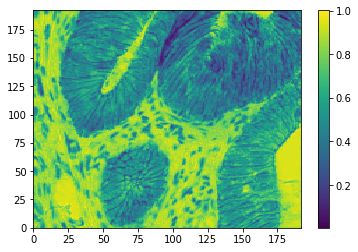

In [40]:
plt.pcolormesh(np.abs(r.obj.array))
plt.colorbar()

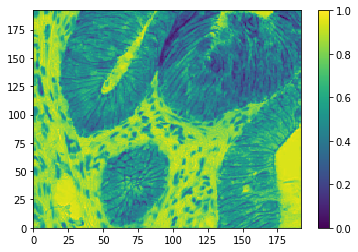

In [41]:
plt.pcolormesh(np.abs(sim.obj.array))
plt.colorbar()